In [32]:
library(gplots);
library(ggplot2);
#library(dplyr) #ONLY USABLE ON KERNEL THAT HAS NO PHYLOLM

ERROR: Error in library(dplyr): there is no package called ‘dplyr’


### BELOW: load raw data and take sample

In [6]:
opc_dir <- "~/geb/data/240_predictions_MatrixStacked.tsv"
#olig_dir <- "/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Oligo/"
opc_peaks <- as.matrix(read.csv(file = opc_dir, sep="\t", stringsAsFactors=F, header=T))
opc_peaks[1:5,1:5]
dim(opc_peaks)

hg38.chr1.827355.827856,X.1.0,X.1.0.1,X.1.0.2,X.1.0.3
hg38:chr1:1024878-1025379,0.514973,0.540576,0.725553,0.7387150
hg38:chr1:2547946-2548447,0.708904,-1.000000,0.478504,0.7080290
hg38:chr1:37554079-37554580,0.682599,-1.000000,0.656187,0.6956410
hg38:chr4:77819335-77819836,-1.000000,0.476115,0.578943,0.5108150
hg38:chr4:77820049-77820550,0.534672,0.801998,0.724545,0.6905950


[1] 183244    242

In [10]:
#take a random sample of 10000
opc_peaks_randsamp <- opc_peaks[sample(nrow(opc_peaks), 10000),]
opc_peaks_randsamp[1:5,1:5]
dim(opc_peaks_randsamp)

#save this sample for later to make loading easier
write.csv(opc_peaks_randsamp, file="~/geb/data/opc_randsamp.csv")

hg38.chr1.827355.827856,X.1.0,X.1.0.1,X.1.0.2,X.1.0.3
rheMac10:chr3:155475508-155476008:250,-1.000000,0.333577,0.597921,0.3376470
rheMac10:chr18:58133437-58133937:250,0.504291,-1.000000,0.789442,0.6324570
mm10:chr2:60962973-60963474,-1.000000,0.496151,0.744965,0.4033800
rn6:chr3:11382774-11383274:250,0.413678,-1.000000,-1.000000,0.7004590
rheMac10:chr10:10892176-10892676:250,0.544576,-1.000000,0.721769,0.5444200


[1] 10000   242

### DATA PROCESSING: USES DPLYR

In [2]:
#load random sample back in for future runs
opc_peaks_randsamp <- as.matrix(read.csv("~/geb/data/opc_randsamp.csv"))

In [3]:
#split by species of interest: hypselodonts vs non-hypselodonts
#first rename the columns to the species given in the text file
names <- readLines(con = "~/geb/data/240_predictions_NamesList.txt")
names <- c("", "Region", names)
names[1:5]

colnames(opc_peaks_randsamp) <- names
opc_peaks_randsamp[1:5, 1:5]

[1] ""                       "Region"                 "Acinonyx_jubatus"      
[4] "Acomys_cahirinus"       "Ailuropoda_melanoleuca"

,Region,Acinonyx_jubatus,Acomys_cahirinus,Ailuropoda_melanoleuca
1,rheMac10:chr3:155475508-155476008:250,-1.000000,0.333577,0.597921
2,rheMac10:chr18:58133437-58133937:250,0.504291,-1.000000,0.789442
3,mm10:chr2:60962973-60963474,-1.000000,0.496151,0.744965
4,rn6:chr3:11382774-11383274:250,0.413678,-1.000000,-1.000000
5,rheMac10:chr10:10892176-10892676:250,0.544576,-1.000000,0.721769


In [4]:
#first get list of hypselodonts
#this dataframe was made using the phenotype information data
hyps_data <- read.csv("~/geb/data/hypselodonts_known.csv")

library(dplyr)
hyps <- hyps_data %>% filter(Hypselodonty == 1)
nonhyps <- hyps_data %>% filter(Hypselodonty == 0)

hyps_names <- hyps$Name
nonhyps_names <- nonhyps$Name

In [5]:
hyps_names

[1] "Acomys_cahirinus"             "Allactaga_bullata"           
 [3] "Aplodontia_rufa"              "Castor_canadensis"           
 [5] "Catagonus_wagneri"            "Cavia_aperea"                
 [7] "Cavia_porcellus"              "Cavia_tschudii"              
 [9] "Chinchilla_lanigera"          "Cricetomys_gambianus"        
[11] "Cricetulus_griseus"           "Ctenodactylus_gundi"         
[13] "Ctenomys_sociabilis"          "Dasyprocta_punctata"         
[15] "Daubentonia_madagascariensis" "Dinomys_branickii"           
[17] "Dipodomys_ordii"              "Dipodomys_stephensi"         
[19] "Dolichotis_patagonum"         "Elaphurus_davidianus"        
[21] "Ellobius_lutescens"           "Ellobius_talpinus"           
[23] "Fukomys_damarensis"           "Glis_glis"                   
[25] "Graphiurus_murinus"           "Heterocephalus_glaber"       
[27] "Hydrochoerus_hydrochaeris"    "Hystrix_cristata"            
[29] "Ictidomys_tridecemlineatus"   "Jaculus_jaculus"             
[31] "Lepus_americanus"             "Marmota_marmota"             
[33] "Meriones_unguiculatus"        "Mesocricetus_auratus"        
[35] "Mesoplodon_bidens"            "Microtus_ochrogaster"        
[37] "Monodon_monoceros"            "Moschus_moschiferus"         
[39] "Mus_caroli"                   "Mus_musculus"                
[41] "Mus_pahari"                   "Mus_spretus"                 
[43] "Muscardinus_avellanarius"     "Myocastor_coypus"            
[45] "Nannospalax_galili"           "Ochotona_princeps"           
[47] "Octodon_degus"                "Ondatra_zibethicus"          
[49] "Onychomys_torridus"           "Oryctolagus_cuniculus"       
[51] "Perognathus_longimembris"     "Peromyscus_maniculatus"      
[53] "Petromus_typicus"             "Psammomys_obesus"            
[55] "Rattus_norvegicus"            "Sigmodon_hispidus"           
[57] "Spermophilus_dauricus"        "Sus_scrofa"                  
[59] "Thryonomys_swinderianus"      "Tragulus_javanicus"          
[61] "Xerus_inauris"                "Zapus_hudsonius"             
[63] "Ziphius_cavirostris"

In [6]:
#now we can select hypselodonts
hyps_opc_peaks <- as.data.frame(opc_peaks_randsamp) %>% select(any_of(hyps_names))
hyps_opc_peaks[1:5, 1:5]

,Acomys_cahirinus,Allactaga_bullata,Aplodontia_rufa,Castor_canadensis,Catagonus_wagneri
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.333577,0.466885,0.454568,0.420941,0.726793
2,-1.000000,0.336123,0.819937,-1.000000,0.546719
3,0.496151,0.582556,0.560527,0.475063,0.766712
4,-1.000000,0.679630,0.519685,0.499033,0.653173
5,-1.000000,0.535001,0.405925,0.492735,0.436828


In [7]:
rownames(hyps_opc_peaks) <- opc_peaks_randsamp[,"Region"]
hyps_opc_peaks[1:5, 1:5]
dim(hyps_opc_peaks)

,Acomys_cahirinus,Allactaga_bullata,Aplodontia_rufa,Castor_canadensis,Catagonus_wagneri
,<chr>,<chr>,<chr>,<chr>,<chr>
rheMac10:chr3:155475508-155476008:250,0.333577,0.466885,0.454568,0.420941,0.726793
rheMac10:chr18:58133437-58133937:250,-1.000000,0.336123,0.819937,-1.000000,0.546719
mm10:chr2:60962973-60963474,0.496151,0.582556,0.560527,0.475063,0.766712
rn6:chr3:11382774-11383274:250,-1.000000,0.679630,0.519685,0.499033,0.653173
rheMac10:chr10:10892176-10892676:250,-1.000000,0.535001,0.405925,0.492735,0.436828


[1] 10000    63

In [8]:
nonhyps_opc_peaks <- as.data.frame(opc_peaks_randsamp) %>% select(any_of(nonhyps_names))
rownames(nonhyps_opc_peaks) <- opc_peaks_randsamp[,"Region"]
nonhyps_opc_peaks[1:5, 1:5]
dim(nonhyps_opc_peaks)

,Acinonyx_jubatus,Ailuropoda_melanoleuca,Ailurus_fulgens,Alouatta_palliata,Ammotragus_lervia
,<chr>,<chr>,<chr>,<chr>,<chr>
rheMac10:chr3:155475508-155476008:250,-1.000000,0.597921,0.337647,0.437756,0.601379
rheMac10:chr18:58133437-58133937:250,0.504291,0.789442,0.632457,0.695482,0.725380
mm10:chr2:60962973-60963474,-1.000000,0.744965,0.403380,0.311648,0.734923
rn6:chr3:11382774-11383274:250,0.413678,-1.000000,0.700459,0.576341,-1.000000
rheMac10:chr10:10892176-10892676:250,0.544576,0.721769,0.544420,0.704795,-1.000000


[1] 10000   146

### PART 2: OPEN CHROMATIN DIFFERENCES

In [17]:
#code to do this part borrowed from HW2
diffPvaluesV <- rep(NA,nrow(hyps_opc_peaks)); #Create an empty vector to store the p-values per open chromatin region in
names(diffPvaluesV) <- rownames(hyps_opc_peaks); #Name that vector with the peak names
diffMeansV <- diffPvaluesV #Create a new vector, also empty, to store the differences across species

#modified to do hypselodonts
peak_ids <- rownames(hyps_opc_peaks)
for(curPeak in peak_ids) { #Loop through each of the peaks
  hypVals <- as.numeric(hyps_opc_peaks[curPeak,]); #For that peak get the HYPSELODONT predicitons
  nonHypVals <- as.numeric(nonhyps_opc_peaks[curPeak,]); #For that peak get the NON-HYPSELODONT predicitons
    if(sd(hypVals,na.rm=T) > 0 && sd(nonHypVals,na.rm=T) > 0) { #Ensure that standard deviation greater than 0
      curTtest <- t.test(x=hypVals,y=nonHypVals);
      diffPvaluesV[curPeak] <- curTtest$p.value
      diffMeansV[curPeak] <- mean(hypVals,na.rm=T) - mean(nonHypVals,na.rm=T);
    }
}

diffResultsF <- data.frame(id=peak_ids, meanDiff=diffMeansV, pvalue=diffPvaluesV, padj = p.adjust(diffPvaluesV))
diffResultsSortF <- diffResultsF[order(diffResultsF$padj),]
diffResultsSortF[1:10,]

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
rheMac10:chr14:94018099-94018599:250,rheMac10:chr14:94018099-94018599:250,-1.166841,3.739627e-40,3.611358e-36
rheMac10:chr7:14970683-14971183:250,rheMac10:chr7:14970683-14971183:250,-1.156606,5.290916e-40,5.108908e-36
rheMac10:chr13:83999136-83999636:250,rheMac10:chr13:83999136-83999636:250,-1.068573,7.480792e-39,7.222705e-35
rheMac10:chr16:16917684-16918184:250,rheMac10:chr16:16917684-16918184:250,-1.041467,1.478127e-36,1.426984e-32
rheMac10:chr2:2753620-2754120:250,rheMac10:chr2:2753620-2754120:250,-1.226441,2.839644e-35,2.741108e-31
hg38:chr6:109448294-109448795,hg38:chr6:109448294-109448795,-1.209471,6.643296e-34,6.412110e-30
rheMac10:chr20:11629969-11630469:250,rheMac10:chr20:11629969-11630469:250,-1.263702,6.831316e-33,6.592903e-29
hg38:chr4:82900421-82900922,hg38:chr4:82900421-82900922,-1.291502,9.475720e-33,9.144069e-29
rheMac10:chr19:4974357-4974857:250,rheMac10:chr19:4974357-4974857:250,-1.068616,1.409556e-32,1.360080e-28


#### USING PHYLOLM: REQUIRES NEW KERNEL WITHOUT DPLYR
I honestly think the results are similar to using the t-test but we will do this anyway.

In [10]:
#modify the data so that the variables are on the top, animals on the side, add hypselodonty
library(tidyr)
hypsTemp <- t(hyps_opc_peaks)
hypsTemp <- as.data.frame(hypsTemp)
hypsTemp <- hypsTemp %>% mutate(Hypselodont = 1)

nonhypsTemp <- t(nonhyps_opc_peaks)
nonhypsTemp <- as.data.frame(nonhypsTemp)
nonhypsTemp <- nonhypsTemp %>% mutate(Hypselodont = 0)

combined_hyp_peaks <- bind_rows(hypsTemp, nonhypsTemp)
combined_hyp_peaks[1:5, 1:5]
dim(combined_hyp_peaks)

#write this as csv so that we can read it in to do phylolm
write.csv(combined_hyp_peaks, file="~/geb/data/hyps_opc_peaks.csv")

,rheMac10:chr3:155475508-155476008:250,rheMac10:chr18:58133437-58133937:250,mm10:chr2:60962973-60963474,rn6:chr3:11382774-11383274:250,rheMac10:chr10:10892176-10892676:250
,<chr>,<chr>,<chr>,<chr>,<chr>
Acomys_cahirinus...1,0.333577,-1.000000,0.496151,-1.000000,-1.000000
Allactaga_bullata...2,0.466885,0.336123,0.582556,0.679630,0.535001
Aplodontia_rufa...3,0.454568,0.819937,0.560527,0.519685,0.405925
Castor_canadensis...4,0.420941,-1.000000,0.475063,0.499033,0.492735
Catagonus_wagneri...5,0.726793,0.546719,0.766712,0.653173,0.436828


[1]   126 10001

In [14]:
library(phylolm)
library(janitor)
zoonomiaTree <- read.tree(file = "~/geb/data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

#load in data from earlier:
opc_peaks_randsamp <- as.matrix(read.csv("~/geb/data/opc_randsamp.csv"))
combined_hyp_peaks <- read.csv("~/geb/data/hyps_opc_peaks.csv")
combined_hyp_peaks[1:5,1:5]

,X,rheMac10.chr3.155475508.155476008.250,rheMac10.chr18.58133437.58133937.250,mm10.chr2.60962973.60963474,rn6.chr3.11382774.11383274.250
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acomys_cahirinus...1,0.333577,-1.000000,0.496151,-1.000000
2,Allactaga_bullata...2,0.466885,0.336123,0.582556,0.679630
3,Aplodontia_rufa...3,0.454568,0.819937,0.560527,0.519685
4,Castor_canadensis...4,0.420941,-1.000000,0.475063,0.499033
5,Catagonus_wagneri...5,0.726793,0.546719,0.766712,0.653173


In [7]:
combined_hyp_peaks <- clean_names(combined_hyp_peaks)
peakNames <- colnames(combined_hyp_peaks)
peakNames <- peakNames[! peakNames %in% c('hypselodont')]
peakNames[1:5]

[1] "rheMac10.chr3.155475508.155476008.250"
[2] "rheMac10.chr18.58133437.58133937.250" 
[3] "mm10.chr2.60962973.60963474"          
[4] "rn6.chr3.11382774.11383274.250"       
[5] "rheMac10.chr10.10892176.10892676.250"

In [ ]:
#running phylolm on all peaks

for(curPeak in peakNames) {
    peakLmFit <- phylolm(curPeak~Hypselodont, data=combined_hyp_peaks, phy=zoonomiaTree, model="BM")
    peakLmFitSum <- summary(peakLmFit)
    #peakLmFitSum
}

PvaluesPHY <- rep(NA,nrow(hyps_opc_peaks))
names(PvaluesPHY) <- rownames(hyps_opc_peaks)
corrsPHY <- PvaluesPHY
slopesPHY <- PvaluesPHY

curIndex = 1

for(curPeak in peakNames) {
    peakLmFit <- phylolm(as.numeric(combined_hyp_peaks[,curIndex]) ~ hypselodont, 
                         data=combined_hyp_peaks, 
                         phy=zoonomiaTree, model="BM")
    peakLmFitSum <- summary(peakLmFit)
    
    PvaluesPHY[curPeak] <- peakLmFitSum$coefficients[8]
    slopesPHY[curPeak] <- peakLmFitSum$coefficients[2]
    #print(peakLmFitSum$coefficients[8])
    corrsPHY[curPeak] <- peakLmFitSum$adj.r.squared
    curIndex <- curIndex + 1
}

phyloRes <- data.frame(id=peakNames, r_squared_adj=corrsPHY,
                       effect_size=slopesPHY,pvalue=PvaluesPHY, 
                       padj = p.adjust(PvaluesPHY))
phyloRes <- phyloRes[order(phyloRes$padj),]
phyloRes[1:10,]

write.csv(phyloRes, file="phyloRes.csv")


#### Plotting Histograms
First, for the t-test:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 343 rows containing non-finite outside the scale range (`stat_bin()`).”


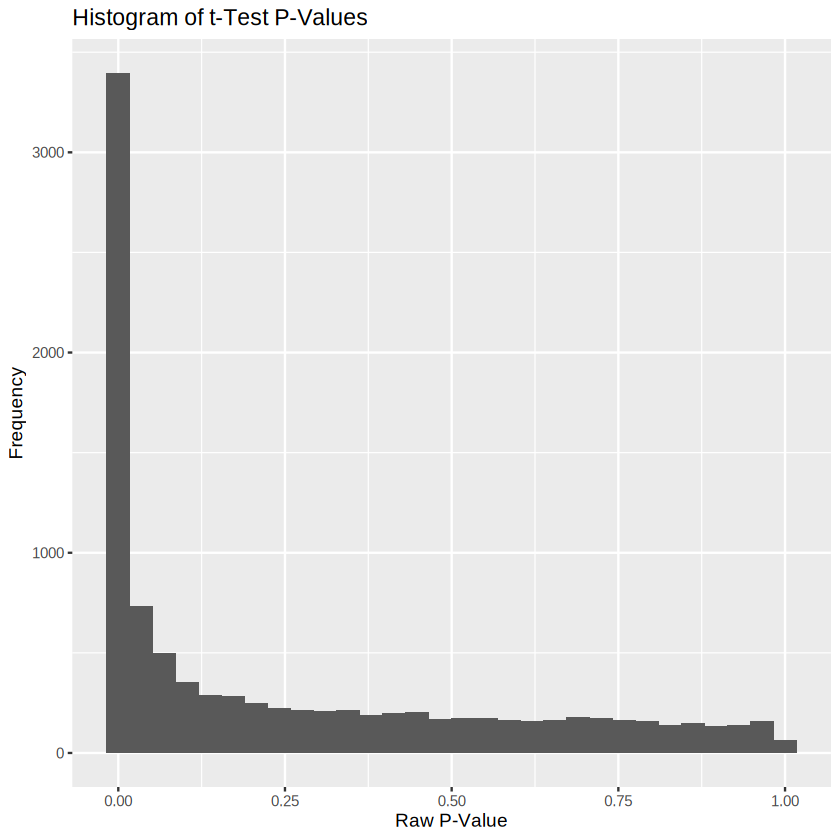

In [62]:
ggplot(data = diffResultsSortF, aes(x=pvalue)) +
    geom_histogram() +
    labs(x = "Raw P-Value",
         y = "Frequency",
         title = "Histogram of t-Test P-Values")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 343 rows containing non-finite outside the scale range (`stat_bin()`).”


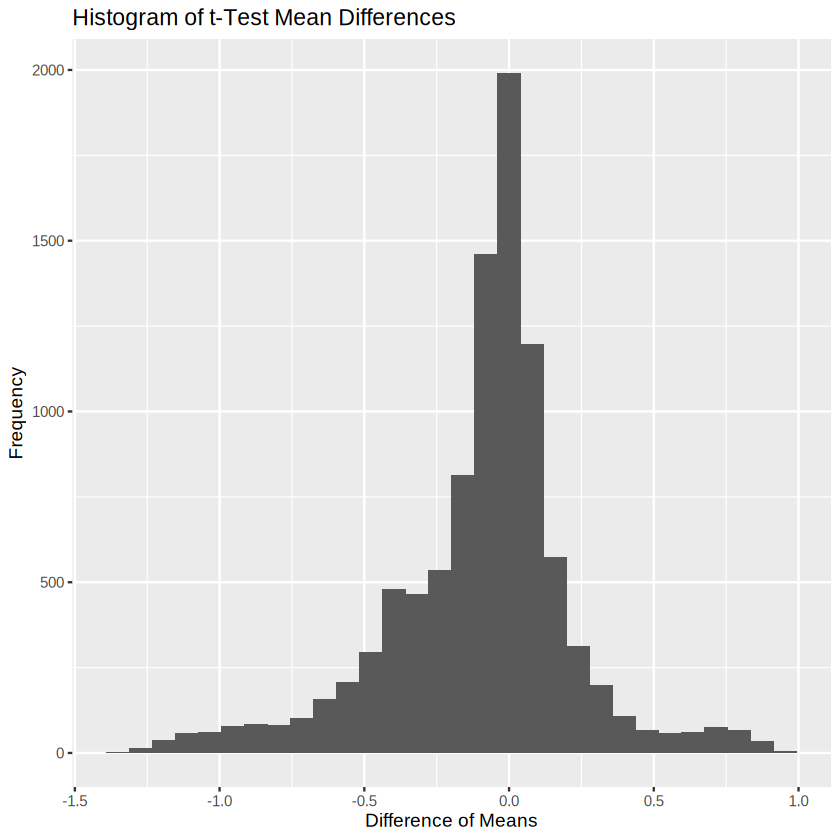

In [63]:
ggplot(data = diffResultsSortF, aes(x=meanDiff)) +
    geom_histogram() +
    labs(x = "Difference of Means",
         y = "Frequency",
         title = "Histogram of t-Test Mean Differences")

In [ ]:
#phyloLM results
ggplot(data = phyloRes, aes(x=pvalue)) +
    geom_histogram() +
    labs(x = "Raw P-Value",
         y = "Frequency",
         title = "Histogram of PhyloLM P-Values")

ggplot(data = phyloRes, aes(x=effect_size)) +
    geom_histogram() +
    labs(x = "Effect Size",
         y = "Frequency",
         title = "Histogram of t-Test Mean Differences")